Отдел аналитики вместе с отделом маркетинга крупного интернет-магазина подготовили список гипотез для увеличения выручки. Необходимо провести приоритезацию гипотез, запустить и проанализировать А/В тест.

План работы:
1. предобработка данных

2. приоритезация гипотез:
- по фреймоворку ICE
- по фреймворку RICE
- выделение лидирующей гипотезы

3. Анализ А/В теста:
- Построим график кумулятивной выручки по группам
- Построим график кумулятивного среднего чека по группам
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A
- Построим график кумулятивного среднего количества заказов на посетителя по группам
- Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
- Построим точечный график количества заказов по пользователям
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя 
- Выберем границу для определения аномальных пользователей
- Построим точечный график стоимостей заказов
- Посчитаем 95-й и 99-й перцентили стоимости заказов 
- Выберем границу для определения аномальных заказов
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

4. Примем решение по результатам теста. Варианты решений:
 - Остановить тест, зафиксировать победу одной из групп
 - Остановить тест, зафиксировать отсутствие различий между группами
 - Продолжить тест

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
pd.set_option('display.max_colwidth', None) # отображения полного содержания ячеек

In [2]:
# сохраним данные в таблицы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')


In [3]:
# напишем функцию для получения информации о датафрейме

def df_info (data):
    print('\n Первые 10 строк')
    display(data.head(10))
    print('\n Последние 10 строк')
    display(data.tail(10))
    print('\n Типы данных \n')
    display(data.info())
    print('\n Статистическая сводка')
    display(data.describe())
    print('\n Пропуски')
    display(data.isna().sum())
    print('\n Процент пропусков от всего датасета')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\n Дубликаты')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [4]:
# проверим на ошибки датасет hypothesis
df_info(hypothesis)


 Первые 10 строк


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5



 Последние 10 строк


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5



 Типы данных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None


 Статистическая сводка


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000



 Пропуски


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


 Процент пропусков от всего датасета


Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64


 Дубликаты
Дубликатов НЕТ


Как видим, дубликатов и пропусков нет, типы данных корректные. Приведём названия столбцов к общепринятому формату:

In [5]:
hypothesis.columns = hypothesis.columns.str.lower() 
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Проверим остальные 2 датасета на ошибки

In [6]:
# датасет orders
df_info(orders)


 Первые 10 строк


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B



 Последние 10 строк


,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B



 Типы данных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None


 Статистическая сводка


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06



 Пропуски


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


 Процент пропусков от всего датасета


transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64


 Дубликаты
Дубликатов НЕТ


Дубликатов и пропусков нет, нужно исправить название столбцов - привести к змеивидному и назначить корректный формат даты

In [7]:
#приведём к нижнему регистру и добавим нужнее подчёркивание для удобства чтения
orders.columns = orders.columns.str.replace('Id', '_id') 
#приведём столбцы с датой к типу datetime
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
# датасет visitors
df_info(visitors)


 Первые 10 строк


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406



 Последние 10 строк


,date,group,visitors
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718



 Типы данных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None


 Статистическая сводка


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000



 Пропуски


date        0
group       0
visitors    0
dtype: int64


 Процент пропусков от всего датасета


date        0.0
group       0.0
visitors    0.0
dtype: float64


 Дубликаты
Дубликатов НЕТ


Пропусков и дубликатов нет, меняем формат даты

In [9]:
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Скачали и сохранили датасеты, проверили корректность данных. Пропусков и дубликатов нигде нет, колонки с датами были приведены к формату datetime64, исправлено написание названий столбцов - приедено к общепринятой форме.

Датасет orders содержит 1196 записей, датасет visitors - 61 запись.



Посмотрим на распределение пользователей по группам в таблице orders


In [10]:
users_qntty = orders.groupby('group')['visitor_id'].nunique().reset_index()
users_qntty

,group,visitor_id
0,A,503
1,B,586


Видим, что в группу B попало больше пользователей, чего быть не должно. В реальной работе, при проведении А/В теста используются специальные калькуляторы, которые высчитывают необходимое количество участников в каждой группе, а также проводят АА тест, чтобы проверить корректность работы A/B-тестирования.

Проверим, нет ли пользователей, попавших и в группу А, и в группу В.

In [11]:
both_groups = orders.groupby('visitor_id')['group'].nunique().reset_index()
both_groups[both_groups['group']>1]['visitor_id'].count()

58

Получаем, что 58 пользователей попали и в группу А, и в группу В. Удалим их.

In [12]:
# сохраним id пользователей, оказавшихся в двух группах
double_groups = both_groups[both_groups['group']>1]['visitor_id']

# и удалим записи с их id из таблицы orders
orders = orders.query('visitor_id not in @double_groups').reset_index(drop=True)

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 39.8+ KB


### Часть 1. Приоритизация гипотез.

В датасете hypothesis имеем 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. 

<b>Применим фреймворк ICE</b> для приоритизации гипотез и отсортируем их по убыванию приоритета. Расчтёт проведём по формуле (impact * confidense)/effort 

In [14]:
hypothesis['ice_score'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'],2)
hypothesis[['hypothesis', 'ice_score']].sort_values(by='ice_score', ascending=False)

,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


На первом месте по ICE у нас гипотеза под номером 8 - "Запустить акцию, дающую скидку на товар в день рождения". Подарки - это всегда хорошо, даже без повода. А на день рождения - тем более! Именно поэтому здесь высокие показатели impact и confidence, которые отвечают за удовлетворение от продукта и насколько мы можем быть в этом уверены. Средний показатель efforts (5 баллов), думаю, связан со стоимостью смс-рассылки, что гораздо эффективнее, чем рассылка на почту или тематические баннеры на сайте.

<b>Далее рассмотрим модель RICE</b> применительно к нашему датасету. Расчтёт проведём по формуле (reach * impact * confidense)/effort

In [15]:
hypothesis['rice_score'] = hypothesis['ice_score']* hypothesis['reach'] 
hypothesis.sort_values(by='rice_score', ascending=False)  

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,39.99
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8.96
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,3.99
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


В этой формуле используется ещё один показатель - reach, т.е, охват аудитории. У гипотезы номер 8 этот показатель самый низкий, т.к. коэффициент reach здесь равен 1, ведь день рождения, как известно, лишь раз в году.

Напротив, гипотеза <i>"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"</i>, имеющая охват 10, заняла первое место, опередив вторую гипотезу ровно в 2 раза.

<b>Вывод</b>

Модель ICE, основанная на удовлетворённости от продукта и нашей в этом уверенности, может быть очень эффеткивной, если не важен максимальный охват аудитории. В случае же, если охват важен - модель RICE оказывается наиболее приоритетной, что и показали наши расчёты.

Для А/В тестов будем основываться на гипотезе №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Часть 2. Анализ A/B-теста

#### Построим график кумулятивной выручки по группам

Создадим датафреймы с уникальными агрегироваными кумулятивными данными по каждый таблице:

In [16]:
#создаем массив уникальных пар значений дат и групп теста
dt_groups = orders[['date', 'group']].drop_duplicates()  

#получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dt_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dt_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max', 
        'visitors': 'sum'
    }
    ),
    axis=1,
).sort_values(by=['date', 'group']) 

In [17]:
# выведем полученные таблицы на экран
display(orders_aggregated.head()) 
print('')
display(visitors_aggregated.head())  

,date,group,transaction_id,visitor_id,revenue
45,2019-08-01,A,23,19,142779
54,2019-08-01,B,17,17,59758
149,2019-08-02,A,42,36,234381
147,2019-08-02,B,40,39,221801
245,2019-08-03,A,66,60,346854


,date,group,visitors
45,2019-08-01,A,719
54,2019-08-01,B,713
149,2019-08-02,A,1338
147,2019-08-02,B,1294
245,2019-08-03,A,1845


Объединим таблицы

In [18]:
# объединям полученные таблицы по дате и группе 
cumulative_df = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
# переименум столбцы 
cumulative_df.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
] 
# выведем полученную таблицу
cumulative_df.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим график

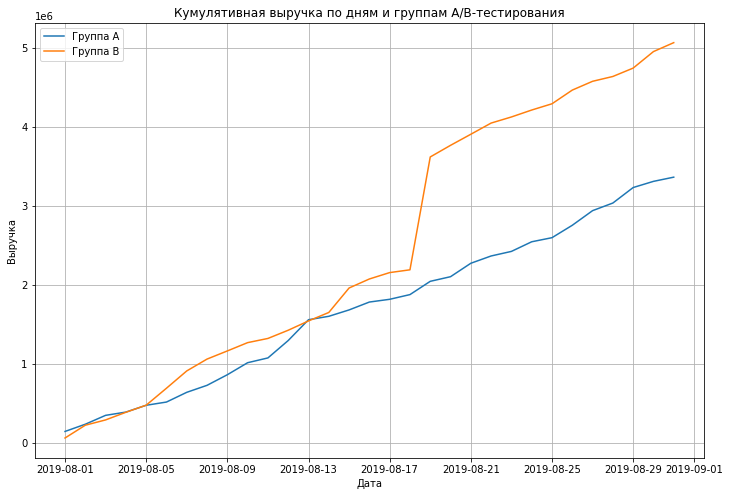

In [19]:
# зададим размеры графика 
plt.figure(figsize=(12,8))  

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_df[cumulative_df['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_df[cumulative_df['group']=='B'][['date','revenue', 'orders']]

# строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.grid()
plt.show() 

Группа В практически сразу вышла в лидеры, а примерно 19 августа произошёл резкий рост, что можно объяснить двумя причинами:
- либо очень дорогие покупки, одна или несколько,
- либо очень большое количество обычных покупок



Посмотрим динамику для группы B с изменение кол-ва заказов и выручки:



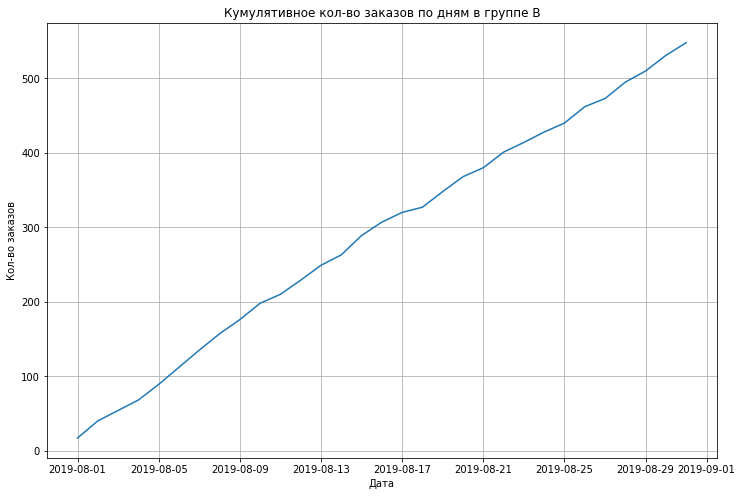

In [20]:
# построим график по количеству заказов 
plt.figure(figsize=(12,8)) 
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['orders'])  
# зададим описание графика
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов') 
plt.title('Кумулятивное кол-во заказов по дням в группе B')
plt.grid()
plt.show() 

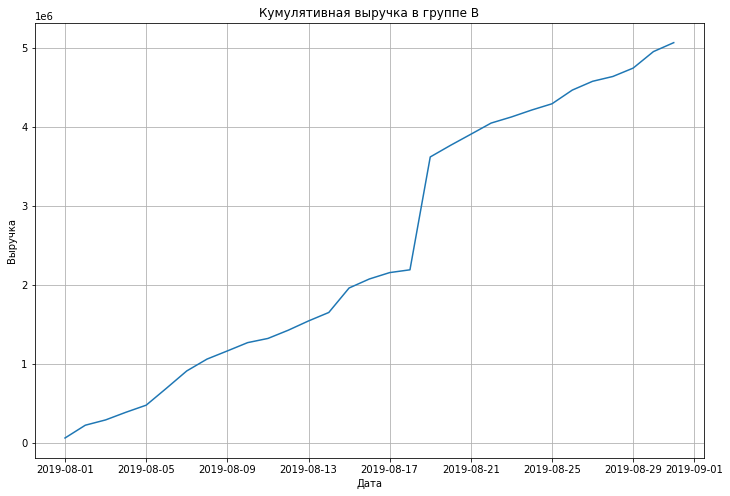

In [21]:
# построим график с выручкой 
plt.figure(figsize=(12,8)) 
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'])  
# зададим описание графика
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка в группе B')
plt.grid()
plt.show() 

Как видим, в группе В 19 августа был 1 или несколько очень крупных заказов

#### Построим график кумулятивного среднего чека по группам.

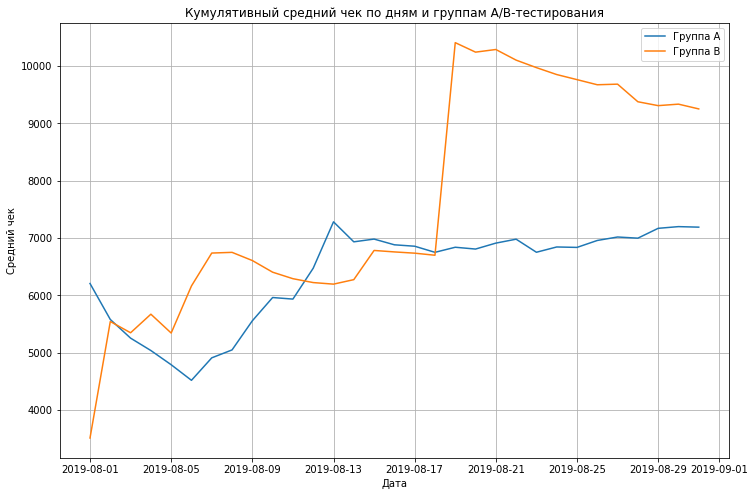

In [22]:
# зададим размеры графика  
plt.figure(figsize=(12,8)) 

# построим графики, что бы получить средний чек, разделим выручку на число заказов
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()  

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.grid()
plt.show()  

Как видим, в первой половине грифика кривые ведут себя ожидаемо - средний чек то увеличивается, то уменьшается в обоих группах. есть сильные повышения, есть сильные падения, но в целом, группы находятся на сопоставимом уровне - к середине графика показывают одинаковую тенденцию к росту. 19-го августа средний чек группы В очень резко вырос чуть меньше, чем на 50% с последующим откатом прмерно на 1000 вниз в течение следующих 10 дней. Группа А, в свою очередь, постепенно увеличивает показатель среднего чека.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

Объединим данные в однин датафрейм

In [23]:
# объединим по столбцу с датой и зададим суффиксы для каждый группы 
merged_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)

In [24]:
merged_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


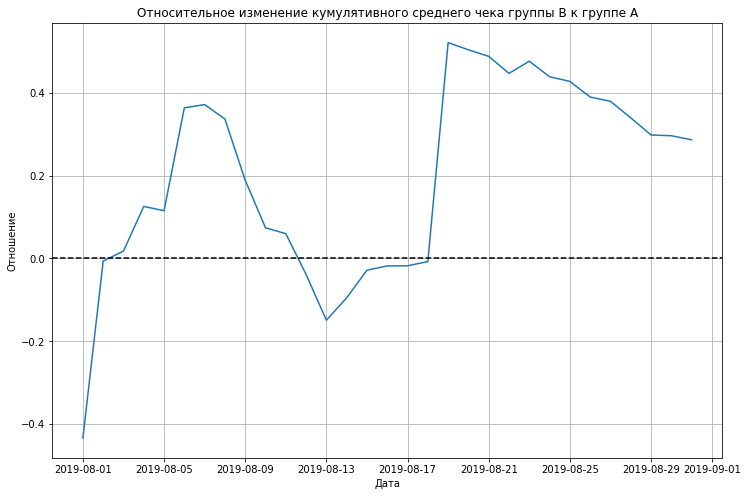

In [25]:
# и построим график
plt.figure(figsize=(12,8))   
# cтроим отношение средних чеков
plt.plot(
    merged_revenue['date'],
    (merged_revenue['revenue_b']/
     merged_revenue['orders_b'])/
    (merged_revenue['revenue_a']/
     merged_revenue['orders_a'])
    -1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')  
# зададим описание графика 
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.grid()
plt.show()

Видим несколько пиков, что указывает на крупные покупки


Первый пик можно объяснить падением среднего чека в группе А. В целом группа А начала график с падения, а групп В - с роста. Но далее наметилась одинаковая тенденция - однодневное сильное падение с быстрым ростом в течение последующих нескольких дней. Вот только все эти зеркальные процессы в группе В прошли на день раньше, что в итоге отразилось на графике как рост В.


#### Построим график кумулятивного среднего количества заказов на посетителя по группам

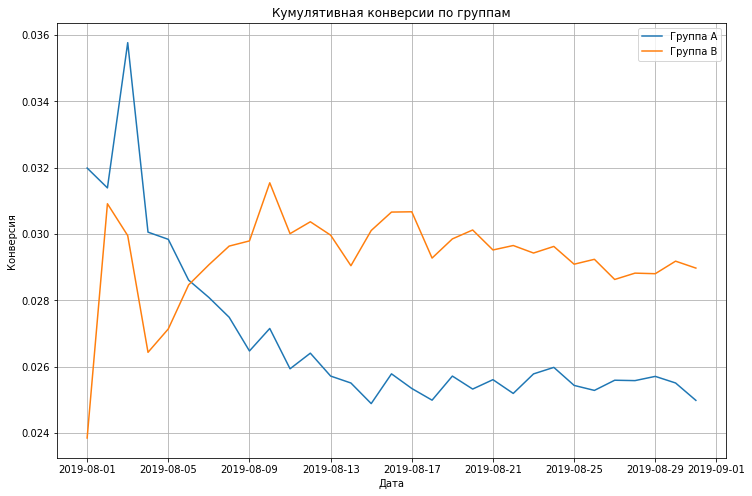

In [26]:
# считаем кумулятивную конверсию
cumulative_df['conversion'] = cumulative_df['orders']/cumulative_df['visitors']

# отделяем данные по группе A
cumulative_df_a = cumulative_df[cumulative_df['group']=='A']

# отделяем данные по группе B
cumulative_df_b = cumulative_df[cumulative_df['group']=='B']

# зададим размеры графика  
plt.figure(figsize=(12,8))   

# строим графики
plt.plot(cumulative_df_a['date'], cumulative_df_a['conversion'], label='A')
plt.plot(cumulative_df_b['date'], cumulative_df_b['conversion'], label='B')


# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
# задаем масштаб осей
plt.xlabel('Дата')
plt.ylabel('Конверсия') 
plt.title('Кумулятивная конверсии по группам')
plt.grid()
plt.show()

По графику видно, что первые 4 дня конверсия гля 2 групп имела общую тенденцию с большими скачками, но после резко поменялась: 
- группа В очень сильно увеличила конверсию и скорректировалась на уровне 0.028-0.030, 
- группа А просела и установилась на уровне 0.024-0.026

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Объединим таблицы конверсий

In [27]:
# объединим по столбцу с датой и зададим суффиксы для каждый группы  
merged_сonversion = cumulative_df_a[['date','conversion']].merge(
    cumulative_df_b[['date','conversion']], 
    left_on='date',
    right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)

In [28]:
merged_сonversion.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


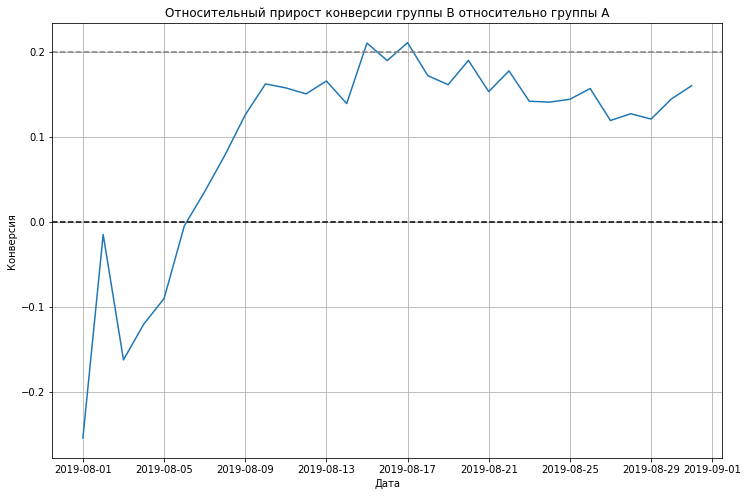

In [29]:
# и построим график  
plt.figure(figsize=(12,8))   

plt.plot(merged_сonversion['date'],
         merged_сonversion['conversion_b']/
         merged_сonversion['conversion_a']-1,
        )
# добавляем ось X c нулевым приростом и отметку в 20% 
plt.axhline(y=0, color='black', linestyle='--')  
plt.axhline(y=0.2, color='grey', linestyle='--') 
# зададим описание графика 
plt.ylabel('Конверсия') 
plt.xlabel('Дата') 
plt.title('Относительный прирост конверсии группы B относительно группы A') 
plt.grid()
plt.show()

На этом графике видим, что прирост конверсии группы В относительно группы А практически всегда положителен за исключением сильного падения 3 августа с откатом к 6 августа в плюсовые значения и дальнейшим значительным ростом со стабилизацией на уровне 10-15%

#### Построим точечный график количества заказов по пользователям

In [30]:
# создадим сводную таблицу с количеством закзазов для каждого пользователя 
orders_count = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
# переименуем столбцы 
orders_count.columns = ['user_id', 'orders']

In [31]:
orders_count.sort_values(by='orders', ascending=False).head()

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


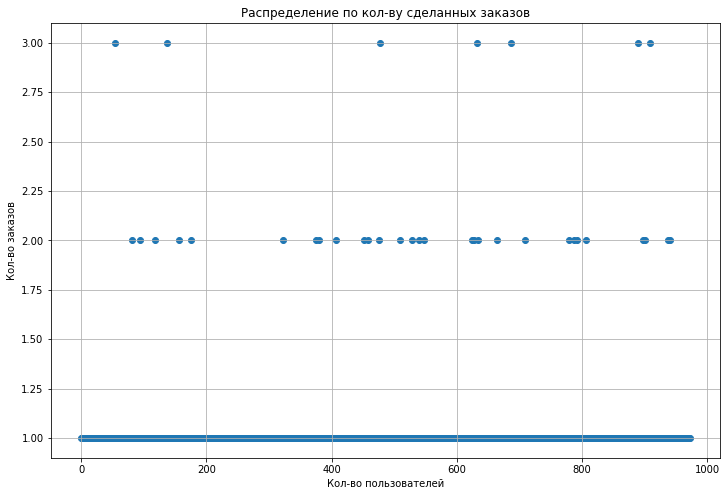

In [32]:
# серия из чисел от 0 до количества наблюдений в orders_count 
x_values = pd.Series(range(0, len(orders_count)))
# построим график  
plt.figure(figsize=(12,8)) 
plt.scatter(x_values, orders_count['orders'])  
# зададим описание графика 
plt.ylabel('Кол-во заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по кол-ву сделанных заказов') 
plt.grid()
plt.show()

Видим, что пользователи с 1 заказом преобладают над доставльными - их подавляющее большинство, но также достаточно моного пользователей с 2 заказами. От 3 до 5 заказов гораздо меньше, причём, пользователей с 5 заказами больше, чем пользователей с 4-мя. И есть несколько гиперактивыных пользователей с количеством заказов до 11 за отчётный период. Скорее всего, это выбросы и нужно будет от них избавляться.

Очень сильно повлияло удаление задвоенных пользователей! Видим, что максимальное количество заказов - 3 и таких пользователей очень мало. Чуть больше пользователей с 2 заказами, а основная масса - 1 заказ. Посмотрим, что даст подсчёт перцентилей.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [33]:
print(np.percentile(orders_count['orders'], [95, 99]))

[1. 2.]


Как видим, 2 заказа сделали не более 95% пользователей, а 4 заказа - не более 99%, что подтверило наше предыдущее наблюдение.

Устанавливаем границу по колличеству заказов на пользователя в 3 шт.

1 заказ сделали не более 95% пользователей, а 2 заказа - не более 99%. Устанавливаем границу в 2 заказа.

In [34]:
too_much_orders = 2

#### Построим точечный график стоимостей заказов

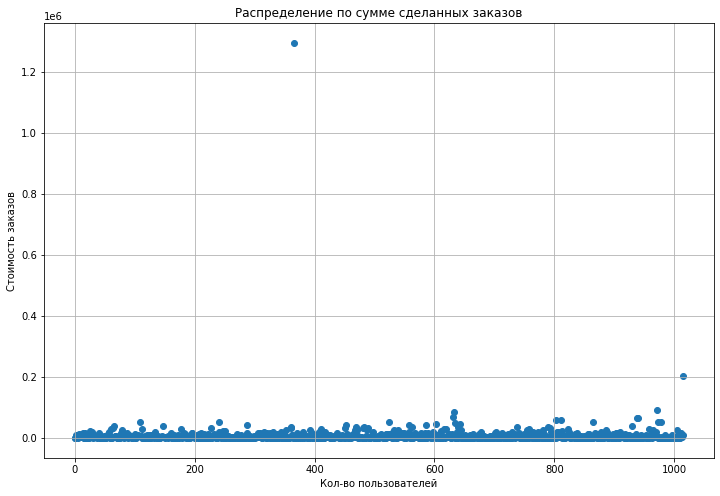

In [35]:
# построим график
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(12,8)) 
scattter_plot = plt.scatter(x_values, orders['revenue'])  
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.grid()
plt.show()

Явно выбиваются 2 значения, посмотрим топ 5 заказов по сумме

In [36]:
orders[['visitor_id', 'revenue']].sort_values(by='revenue', ascending=False).head()

,visitor_id,revenue
365,1920142716,1294500
1015,2108080724,202740
971,1307669133,92550
632,888512513,86620
631,4133034833,67990


Сделаем ограничение суммы в 100000 и построим график

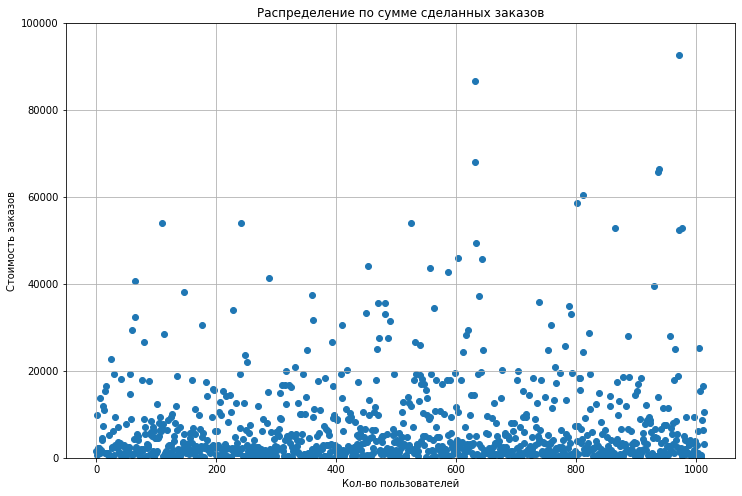

In [37]:
# построим график 
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(12,8))
plt.scatter(x_values, orders['revenue'])
# задаем ограничение
plt.ylim(0, 100000) 
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.grid()
plt.show()

Видим, что основная масса заказов помещается в размер 10000 - 20000, но точнее сказать сложно

#### Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов

In [38]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Получаем, что заказы более 26785 делают не более 5% пользователей, а заказы больше 53904 - не более 1%

Установим границу по стоимости заказов в 28000 рублей

In [39]:
too_expensive_order  = 28000

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы.

<u>Нулевая</u>: статистически значимых различий в среднем количестве заказов на посетителя между группами нет.
<br><u>Альтернативная</u>: статистически значимые различия в среднем количестве заказов на посетителя между группами есть.

Для проверки предположения о нормальности распределения данных используем критерий Манна-Уитни, так как в данных, как мы уже заметили, есть выбросы, а иные методы существенно повлияют на результат.

In [40]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['user_id', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['user_id', 'orders'] 

sampleA = pd.concat([orders_by_users_A['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_A['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_users_B['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_B['orders'])), name='orders')],axis=0)

orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['user_id', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['user_id', 'orders']

sample_A = pd.concat(
    [
        orders_by_users_A['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B = pd.concat(
    [
        orders_by_users_B['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


alpha = 0.05
result_1 = stats.mannwhitneyu(sample_A, sample_B)[1]

print('Значение P-value:', "{0:.3f}".format(result_1))

if result_1 < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые отличия есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимых отличий нет') 

print('Относительная разница между группами:',"{0:.2%}".format((sample_B.mean()/sample_A.mean()-1)))


Значение P-value: 0.011
Отвергаем нулевую гипотезу: статистически значимые отличия есть
Относительная разница между группами: 15.98%


P-value меньше 0.05 - значит нулевую гипотезу отвергаем, статистически значимые отличия есть, относительный прирост среднего количества заказов группы В к группе А равен 15.98%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы.

<u>Нулевая</u>: статистически значимых различий в среднем чеке заказа между группами нет.
<br><u>Альтернативная</u>: статистически значимые различия в среднем чеке заказа между группами есть.

Здесь также используем критерий Манна-Уитни

In [41]:

result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print('Значение P-value:','{0:.3f}'.format(result_2))

if result_2 < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые отличия есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу: статистически значимых отличий нет') 
      
print('Относительная разница между группами:','{0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение P-value: 0.829
Не получилось отвергнуть нулевую гипотезу: статистически значимых отличий нет
Относительная разница между группами: 28.66%


P-value больше 0.05 - значит нулевую гипотезу не отвергаем, статистически значимых отличий между группамми в среднем чеке нет, но относительный прирост среднего чека группы В к А равен 28.66%, это очень много.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Сформулируем гипотезы.

<u>Нулевая</u>: статистически значимых различий в среднем количестве заказов на посетителя между группами нет.
<br><u>Альтернативная</u>: статистически значимые различия в среднем количестве заказов на посетителя между группами есть.

Здесь также используем критерий Манна-Уитни

In [42]:
multiple_buyers = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > np.percentile(orders_count['orders'], 95)]['user_id'],
        orders_by_users_B[orders_by_users_B['orders'] > np.percentile(orders_count['orders'], 95)]['user_id'],
    ],
    axis=0,
)
expensive_buyers = orders[orders['revenue'] > too_expensive_order]['visitor_id']
abnormal_users = (
    pd.concat([multiple_buyers, expensive_buyers], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Абсолютные потери(количество аномальных пользователей):' ,len(abnormal_users)) 
print('Относительные потери:', round(len(abnormal_users)/orders['visitor_id'].nunique(),3))

Абсолютные потери(количество аномальных пользователей): 83
Относительные потери: 0.085


In [43]:
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

result_3 = stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]

alpha = 0.05

print('Значение P-value:','{0:.3f}'.format(result_3))

if result_3 < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые отличия есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу: статистически значимых отличий нет') 
      
print('Относительная разница между группами:','{0:.2%}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

Значение P-value: 0.012
Отвергаем нулевую гипотезу: статистически значимые отличия есть
Относительная разница между группами: 18.11%


P-value больше 0.05, следовательно статистическая значимость в среднем количестве заказов на посетителя достигнута, выборка В лучше выборки А.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы.

<u>Нулевая</u>: статистически значимых различий в среднем чеке заказа между группами нет.
<br><u>Альтернативная</u>: статистически значимые различия в среднем чеке заказа между группами есть.

Здесь также используем критерий Манна-Уитни

In [44]:
result_4 = stats.mannwhitneyu(
            orders[
                np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]


alpha = 0.05

print('Значение P-value:', '{0:.3f}'.format(result_4))

if result_3 < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые отличия есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу: статистически значимых отличий нет') 

print('Относительная разница между группами:',
    "{0:.2%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение P-value: 0.851
Отвергаем нулевую гипотезу: статистически значимые отличия есть
Относительная разница между группами: -0.57%


P-value больше 0.05 - значит нулевую гипотезу не отвергаем, статистически значимых отличий между группамми в среднем чеке нет. 

Однако, из теста видим, что средний чек группы B ниже среднего чека группы А на -0.57%, в то время как по "сырым" данным, он был больше почти в 20 раз, что показывает вляние дорогих заказов.

Вывод:
На стадии предобработки данные были проверены на корректность: пропусков и дубликатов не обнаружено, колонки с датами были приведены к формату datetime64, исправлено написание названий столбцов - приедено к общепринятой форме. Датасет orders содержит 1196 записей, датасет visitors - 61 запись.

Провели коррекцию попадания пользователей в обе группы и очистили датафрейм orders от данных с id этих пользователей. Датафрейм содержит 108

Приоритезация тестов выявила предпочтительность гипотезы №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", т.к. модель ICE, основанная на удовлетворённости от продукта и нашей в этом уверенности, может быть очень эффеткивной, если не важен максимальный охват аудитории. В случае же, если охват важен - модель RICE оказывается наиболее приоритетной, что и показали наши расчёты.

Однако, здесь можно дать рекомендацию доработать находящуюся на 1 месте по по ICE гипотезу под номером 8 - "Запустить акцию, дающую скидку на товар в день рождения". Подарки - это всегда хорошо, тем более без повода.

Если говорить про гипотезу №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", то, основываясь на результатах А/В тестов можно сказать, что по среднему количеству заказов и по "сырым" данным (+15.98%), и по "очищенным" (+17.27%) лидирует группа В. По среднему чеку статистические различия между группами отсутсвуют.

Можно остановить тест и зафиксировать рост показателей группы В по среднему количеству заказов, передать данные в отдел маркетинга и/или разработки для работы над увеличением среднего чека. Также могу порекомендовать передать данные с выбросами в отдел работы с клиентами для того, чтобы повысить лояльность клиентов, которые совершают такие крупные покупки и, возможно, увеличить подобные заказы от этих клиентов либо знакомых / деловых партнёров этих клиентов.

Также, могу порекомендовать продолжать собирать аналитику и выяснить, являются ли отсеянные нами крупные заказы выбросами или они будут посторяться с какой-то периодичностью либо сезонностью. Возможно, эти сверхкрупные выбросы на самом деле не выбросы, а клиенты, которые будут с некоторой периодичностью к нам возвращаться (как, например, клиенты, покупающие домашнюю технику не каждый месяц покупают холодильник, но кроме него могут купить и телевизор, и новую модель телефона, и т.д. Либо это могут быть специалисты отдела закупок, раз в определённый период делающие закупки для своих организаций или клиентских мероприятий).

Тем более, что средний чек и количество заказов - это не главные показатели эффективности бизнеса год к году, важна ещё и маржа, и возврат на инвестиции, а здесь имеет значение каждый чек, независимо от того, признан он выбросом или нет.